In [1]:
import os
import re
import uproot
import numpy as np

import matplotlib.pyplot as plt
%matplotlib widget

### Merging

In [2]:
fname  = os.path.expandvars("$LUSTRE/CProfiles/mu-/tuning/cprofiles_merged.root")
fname = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/CProfiles/cprofiles_merged.root")
f  = uproot.open(fname)
print(f.classnames())

# get momentum values
momenta = np.sort([float(re.findall(r'\d+(?:\.\d+)?', key)[0]) for key in f.keys() if re.match("g_\d+", key)])

{'g_50.0;1': 'TH2D', 'g_200.0;1': 'TH2D', 'g_150.0;1': 'TH2D', 'g_350.0;1': 'TH2D', 'g_250.0;1': 'TH2D', 'g_90.0;1': 'TH2D', 'g_70.0;1': 'TH2D', 'g_100.0;1': 'TH2D', 'g_300.0;1': 'TH2D', 'g_400.0;1': 'TH2D', 'g_550.0;1': 'TH2D', 'g_450.0;1': 'TH2D', 'g_1000.0;1': 'TH2D', 'g_650.0;1': 'TH2D', 'g_1200.0;1': 'TH2D', 'g_950.0;1': 'TH2D', 'g_1600.0;1': 'TH2D', 'g_750.0;1': 'TH2D', 'g_1400.0;1': 'TH2D', 'g_1800.0;1': 'TH2D', 'g_850.0;1': 'TH2D', 'g_2300.0;1': 'TH2D', 'g_2000.0;1': 'TH2D', 'g_2900.0;1': 'TH2D', 'g_3500.0;1': 'TH2D', 'g_3800.0;1': 'TH2D', 'g_2600.0;1': 'TH2D', 'g_4700.0;1': 'TH2D', 'g_4100.0;1': 'TH2D', 'g_3200.0;1': 'TH2D', 'g_5000.0;1': 'TH2D', 'g_4400.0;1': 'TH2D', 'gNphot;1': 'TGraph', 'gsthr;1': 'TGraph'}


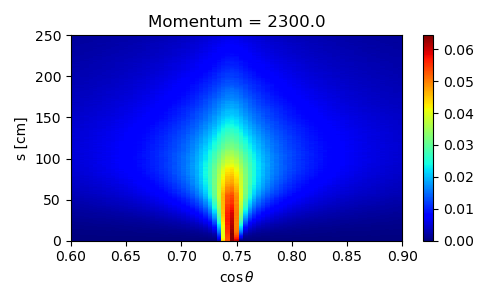

In [6]:
# choose random momentum
momentum = np.random.choice(momenta)
H, thbins, sbins  =  f[f"g_{momentum}"].to_numpy()

plt.figure(figsize=[5, 3])

plt.title(f"Momentum = {momentum}")
plt.pcolormesh(thbins, sbins, H.T, cmap="jet")
plt.xlim([0.6, 0.9])
plt.ylim([None, 250])
plt.xlabel(r"$\cos \theta$")
plt.ylabel("s [cm]")
plt.colorbar()

plt.tight_layout()

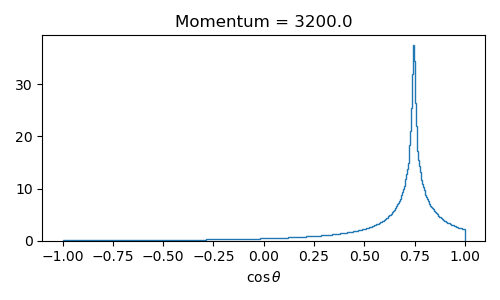

In [7]:
momentum = np.random.choice(momenta)
H, thbins, sbins  =  f[f"g_{momentum}"].to_numpy()

plt.figure(figsize=[5, 3])

plt.title(f"Momentum = {momentum}")
plt.stairs(H.T.sum(axis=0), thbins)
# plt.xlim([0.4, None])
plt.xlabel(r"$\cos \theta$")

plt.tight_layout()

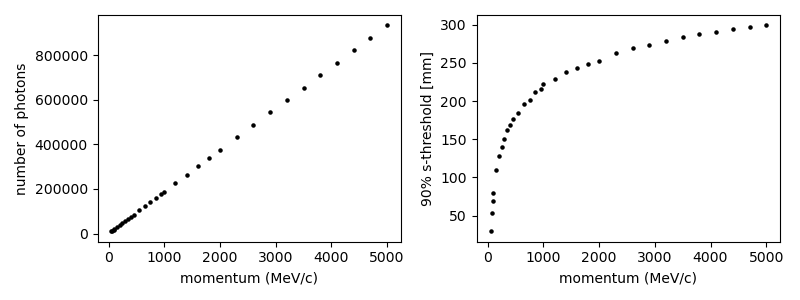

In [18]:
mom, nphotons    = f["gNphot"] .values()
mom, sthresholds = f["gsthr"]  .values()

plt.figure(figsize=[8, 3])

# nphotons
plt.subplot(121)
plt.scatter(mom, nphotons, s=5, c="k")
plt.xlabel("momentum (MeV/c)")
plt.ylabel("number of photons")

#sthreshols
plt.subplot(122)
plt.scatter(mom, sthresholds, s=5, c="k")
plt.xlabel("momentum (MeV/c)")
plt.ylabel("90% s-threshold [mm]")

plt.tight_layout()